## Libraries

In [123]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier

#Load dataset

In [3]:
from google.colab import files
uploaded = files.upload()
import io
dataset = pd.read_csv(io.BytesIO(uploaded['wines.csv']), header=0)

# Exploring Dataset

In [4]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity of ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  Diluted wines         178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
dataset.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,Diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
dataset.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,Diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
dataset.corr()['Class']

Class                   1.000000
Alcohol                -0.328222
Malic acid              0.437776
Ash                    -0.049643
Alcalinity of ash       0.517859
Magnesium              -0.209179
Total phenols          -0.719163
Flavanoids             -0.847498
Nonflavanoid phenols    0.489109
Proanthocyanins        -0.499130
Color intensity         0.265668
Hue                    -0.617369
Diluted wines          -0.788230
Proline                -0.633717
Name: Class, dtype: float64

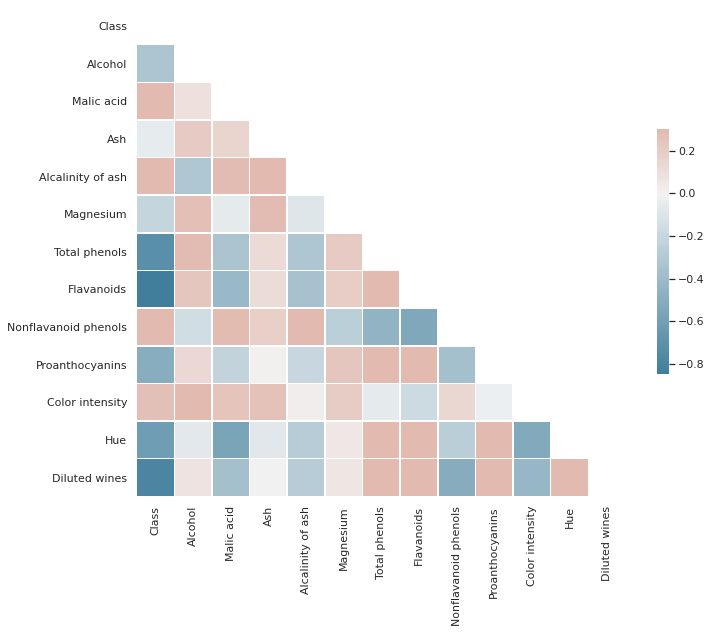

In [9]:
correlation_matrix=dataset.iloc[:,0:13].corr(method="pearson") #Use only predictor variables
sns.set_theme(style="white")
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


# Feature Selection

## Sort correlations

In [10]:
correlation_matrix['Class'].sort_values(ascending=False)
my_filter=correlation_matrix['Class']>=0
print(correlation_matrix.loc[my_filter, 'Class'].sort_values(ascending=False))
my_filter=correlation_matrix['Class']<0
print(correlation_matrix.loc[my_filter, 'Class'].sort_values(ascending=True))

Class                   1.000000
Alcalinity of ash       0.517859
Nonflavanoid phenols    0.489109
Malic acid              0.437776
Color intensity         0.265668
Name: Class, dtype: float64
Flavanoids        -0.847498
Diluted wines     -0.788230
Total phenols     -0.719163
Hue               -0.617369
Proanthocyanins   -0.499130
Alcohol           -0.328222
Magnesium         -0.209179
Ash               -0.049643
Name: Class, dtype: float64


## Choose the most correlated variables as predictors

In [12]:
columns=['Alcalinity of ash', 
'Nonflavanoid phenols',
'Flavanoids',
'Malic acid',
'Flavanoids',       
'Diluted wines',    
'Total phenols',    
'Hue',               
'Proanthocyanins',   
'Alcohol']           
X = dataset.loc[:,columns] #predictors
y = dataset.loc[:,'Class'] #outcome

y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

## Define Training and Test Datasets

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1)
print("Training %d instances"%(x_train.shape[0]))
print("Test %d instances"%(x_test.shape[0]))



Training 133 instances
Test 45 instances


#Foundations of Ensambling Methods


## Marginal Training



In [14]:
#Create models
model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= GaussianNB()
#Training
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## 0. Marginal predictions  

In [16]:

pred1=model1.predict(x_test)
pred2=model2.predict(x_test)
pred3=model3.predict(x_test)

for i in range(0,len(x_test)):
  print([pred1[i], pred2[i], pred3[i]])
print("Marginals Accuracies")



array([3, 2, 1, 2, 1, 3, 2, 1, 3, 2, 1, 1, 2, 1, 2, 2, 3, 1, 2, 1, 1, 2,
       3, 1, 1, 3, 1, 1, 1, 3, 2, 3, 2, 1, 2, 2, 2, 2, 2, 1, 1, 3, 3, 1,
       1])

### Visualization of predictions

DT0.9333333333333333
KN0.9111111111111111
NB0.9777777777777777


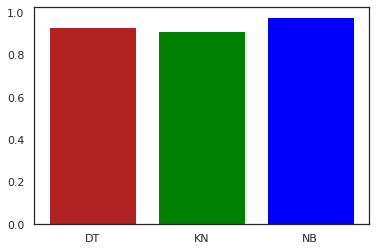

In [17]:
#Function to visualize results
def plot_prediction(prediction, labels):
  levels = np.arange(len(labels))
  # Create bars
  plt.bar(levels, prediction, color=['firebrick', 'green', 'blue'] )
  # Create names on the x-axis
  plt.xticks(levels, labels)
  # Show graphic
  plt.show()
  
#Visualization
names_models=['DT','KN','NB']
predictions=[pred1, pred2, pred3]
accuracies=[]
model_index=0
for m in names_models:
  acc=metrics.accuracy_score(y_test, predictions[model_index])
  accuracies.append(acc)
  model_index+=1
  print(m+str(acc))


#Visualize Accuracy
plot_prediction(accuracies, names_models)
#print("New visitor: propensity :",classifier.predict_proba(browsing_data)[:,1] )

## 1. Max Voting Technique

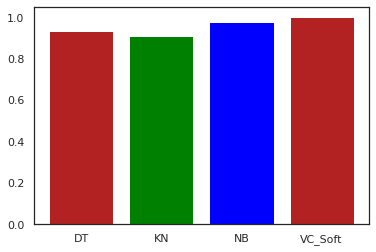

Global Accuracy:1.0


In [18]:
from sklearn.ensemble import VotingClassifier
model = VotingClassifier(estimators=[('dt', model1), ('kn', model2),('nb', model3)], voting='soft')
model.fit(x_train,y_train)

acc=model.score(x_test,y_test)
accuracies.append(acc)
names_models.append("VC_Soft")
plot_prediction(accuracies, names_models)
print("Global Accuracy:"+str(acc))

## 2. Average Technique
In this technique the prediction is averaged. Since usually in classification problems, the prediction is a categorical value, we have to transform such a
prediction into a real value as the probability of the classes. 

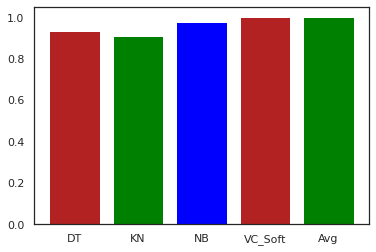

Global Accuracy:1.0


In [19]:
#The meth0d predict_proba is different to predict. 
#This returns the probability of the clases
pred1=model1.predict_proba(x_test) 
pred2=model2.predict_proba(x_test)
pred3=model3.predict_proba(x_test)
finalpred=[]
for i in range(0, len(pred1)):
  averages=(pred1[i,:]+pred2[i,:]+pred3[i,:])/3
  finalpred.append(np.argmax(averages)+1)

finalpred=np.array(finalpred)

acc=metrics.accuracy_score(y_test, finalpred)
accuracies.append(acc)
names_models.append("Avg")
plot_prediction(accuracies, names_models)
print("Global Accuracy:"+str(acc))


## 3. Stacking Techniques

In [131]:
from sklearn.model_selection import StratifiedKFold 

def unfold (data):
  arr=[]
  for x in data:
    for y in x:
      arr.append(list(y))
  return arr

#Encapsulted in a function
def Stacking(model,train,y,test,n_fold):
#Step 1:Define the K-folds parameters
  folds=StratifiedKFold(n_splits=n_fold,random_state=1, shuffle=False)
#Step 2:Define arrays to storage test predictions and train prediction  
  test_pred=[]#np.empty((0,1),float)
  train_pred=[]#np.empty((0,1),float)
#Step 3 Split the train dataset into k-folds, train with k-1 folds and validate
#with the remain fold. 
  acc=0 
  bestModel=None
  for train_indices,val_indices in folds.split(train,y.values):
    #Determine the training and validation datasets based on the splits
    x_train,x_val=train.iloc[train_indices],train.iloc[val_indices]
    y_train,y_val=y.iloc[train_indices],y.iloc[val_indices]
    #Train the model using training data
    model.fit(X=x_train,y=y_train)
    #Predict using validation data
    y_pred=model.predict_proba(x_val)
    train_pred.append(y_pred)#20210620
    #current_acc=metrics.average_precision_score(y_val, y_pred)
    #if(current_acc>acc):
    #  bestModel=model
    #  acc=current_acc
    #Predict using validation data
  test_pred.append(model.predict_proba(test))#20210620
  train_pred=np.array(unfold(train_pred))
  test_pred=np.array(unfold(test_pred))    
  return test_pred,train_pred
  

Using stacking approach

Level 1, model 1

In [132]:
model1 = DecisionTreeClassifier(random_state=1)
#Call Stacking function
test_pred1 ,train_pred1=Stacking(model=model1,n_fold=10, train=x_train,test=x_test,y=y_train)
train_pred1=pd.DataFrame(train_pred1) #New train dataset
test_pred1=pd.DataFrame(test_pred1)   #New test  dataset
print(train_pred1.shape)
print(test_pred1.shape)

(133, 3)
(45, 3)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Level 1, model 2

In [133]:
model2 = KNeighborsClassifier()
test_pred2 ,train_pred2=Stacking(model=model2,n_fold=10,train=x_train,test=x_test,y=y_train)
train_pred2=pd.DataFrame(train_pred2)
test_pred2=pd.DataFrame(test_pred2)

print(train_pred2.shape)
print(test_pred2.shape)

(133, 3)
(45, 3)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Level 2, metamodel

In [134]:
from sklearn.linear_model import LogisticRegression
df_train = pd.concat([train_pred1, train_pred2], axis=1)
df_test = pd.concat([test_pred1, test_pred2], axis=1)

#The metamodel to be used: Logistic Regression 
model3 = LogisticRegression(random_state=1)
model3.fit(df_train,y_train) #? El input

pd.concat([df_train.reset_index(),pd.DataFrame(y_train)], axis=1)
final_predictions=model3.predict(df_test)
print("Global Accurracy:"+str(metrics.accuracy_score(y_test, final_predictions)))



Global Accurracy:0.9333333333333333


## Use sklearn implementation

In [135]:
model1 = DecisionTreeClassifier(random_state=1)
model2 = KNeighborsClassifier()
model3 = LogisticRegression(random_state=1)
estimators=[('DT',model1),('KN', model2)]
clf = StackingClassifier(estimators=estimators,cv=10, stack_method='predict_proba',final_estimator=model3)
clf.fit(x_train,y_train).score(x_test,y_test)

1.0

# Advanced Techniques
## Next Sesion (June 20)

BAGGING

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(x_train, y_train)
model.score(x_test,y_test)


0.9333333333333333

BOOSTING

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1)
model.fit(x_train, y_train)
model.score(x_test,y_test)


0.5555555555555556

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.9111111111111111

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
model = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
model.fit(x_train, y_train);
model.score(x_test,y_test)

0.9662670066889633